# Mentioned

In [2]:
import pandas as pd

pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [3]:
################ MENTIONED ONLY ##########################

# get distances column from all datasets
# first determine if there are any duplicate tweet ids in there
"""
import pandas as pd
import tqdm

for i in tqdm.tqdm(range(0, 112)):
    df = pd.read_feather("s3://mt5599/final/processed_tweets_" + str(i) + ".feather")

    # keep tweets with no distances and NER mention
    mdf_loc_only = df[pd.isnull(df.coordinates_longitude) & (df.ner_type == "LOC")].reset_index()
    mdf_loc_only.to_feather("s3://mt5599/dissertation/mentioned_loc_only_df_" + str(i) + ".feather" )
    mdf_loc_only_duplicates = mdf_loc_only[mdf_loc_only.duplicated(subset = ["id"], keep=False)].drop("index", axis=1).reset_index()
    if mdf_loc_only_duplicates.shape[0] > 0:
        mdf_loc_only_duplicates.to_feather("s3://mt5599/dissertation/duplicates_mentioned_loc_only_df_" + str(i) + ".feather" )
    # new subset with only not tweet duplicates
    mdf_loc_only_noduplicates = mdf_loc_only.drop_duplicates(subset="id", keep=False).drop("index", axis=1).reset_index()
    mdf_loc_only_noduplicates.to_feather("s3://mt5599/dissertation/noduplicates_mentioned_loc_only_df_" + str(i) + ".feather" )
    
    
    # filter tweets with only LOC mention
    mdf_loc = df[df.ner_type == "LOC"].reset_index()
    mdf_loc.to_feather("s3://mt5599/dissertation/mentioned_loc_df_" + str(i) + ".feather" )
    # new subset with only tweet duplicates
    mdf_loc_duplicates = mdf_loc[mdf_loc.duplicated(subset = ["id"], keep=False)].drop("index", axis=1).reset_index()
    if mdf_loc_duplicates.shape[0] > 0:
        mdf_loc_duplicates.to_feather("s3://mt5599/dissertation/duplicates_mentioned_loc_df_" + str(i) + ".feather" )
    # new subset with only not tweet duplicates
    mdf_loc_noduplicates = mdf_loc.drop_duplicates(subset="id", keep=False).drop("index", axis=1).reset_index()
    mdf_loc_noduplicates.to_feather("s3://mt5599/dissertation/noduplicates_mentioned_loc_df_" + str(i) + ".feather" )
    
    # filter tweets with only ORG mention
    mdf_org = df[df.ner_type == "ORG"].reset_index()
    mdf_org.to_feather("s3://mt5599/dissertation/mentioned_org_df_" + str(i) + ".feather" )
    # new subset with only tweet duplicates
    mdf_org_duplicates = mdf_org[mdf_org.duplicated(subset = ["id"], keep=False)].drop("index", axis=1).reset_index()
    if mdf_org_duplicates.shape[0] > 0:
        mdf_org_duplicates.to_feather("s3://mt5599/dissertation/duplicates_mentioned_org_df_" + str(i) + ".feather" )
    # new subset with only not tweet duplicates
    mdf_org_noduplicates = mdf_org.drop_duplicates(subset="id", keep=False).drop("index", axis=1).reset_index()
    mdf_org_noduplicates.to_feather("s3://mt5599/dissertation/noduplicates_mentioned_org_df_" + str(i) + ".feather" )
    
        
    # filter tweets with only PER mention
    mdf_per = df[df.ner_type == "PER"].reset_index()
    mdf_per.to_feather("s3://mt5599/dissertation/mentioned_per_df_" + str(i) + ".feather" )
    # new subset with only tweet duplicates
    mdf_per_duplicates = mdf_per[mdf_per.duplicated(subset = ["id"], keep=False)].drop("index", axis=1).reset_index()
    if mdf_per_duplicates.shape[0] > 0:
        mdf_per_duplicates.to_feather("s3://mt5599/dissertation/duplicates_mentioned_per_df_" + str(i) + ".feather" )
    # new subset with only not tweet duplicates
    mdf_per_noduplicates = mdf_per.drop_duplicates(subset="id", keep=False).drop("index", axis=1).reset_index()
    mdf_per_noduplicates.to_feather("s3://mt5599/dissertation/noduplicates_mentioned_per_df_" + str(i) + ".feather" )
"""

'\nimport pandas as pd\nimport tqdm\n\nfor i in tqdm.tqdm(range(0, 112)):\n    df = pd.read_feather("s3://mt5599/final/processed_tweets_" + str(i) + ".feather")\n\n    # keep tweets with no distances and NER mention\n    mdf_loc_only = df[pd.isnull(df.coordinates_longitude) & (df.ner_type == "LOC")].reset_index()\n    mdf_loc_only.to_feather("s3://mt5599/dissertation/mentioned_loc_only_df_" + str(i) + ".feather" )\n    mdf_loc_only_duplicates = mdf_loc_only[mdf_loc_only.duplicated(subset = ["id"], keep=False)].drop("index", axis=1).reset_index()\n    if mdf_loc_only_duplicates.shape[0] > 0:\n        mdf_loc_only_duplicates.to_feather("s3://mt5599/dissertation/duplicates_mentioned_loc_only_df_" + str(i) + ".feather" )\n    # new subset with only not tweet duplicates\n    mdf_loc_only_noduplicates = mdf_loc_only.drop_duplicates(subset="id", keep=False).drop("index", axis=1).reset_index()\n    mdf_loc_only_noduplicates.to_feather("s3://mt5599/dissertation/noduplicates_mentioned_loc_only_d

In [4]:
# combining into one dataset
"""
mdfs_loc = []
mdfs_loc_only = []
mdfs_org = []
mdfs_per = []
mdfs_loc_duplicates = []
mdfs_loc_only_duplicates = []
mdfs_org_duplicates = []
mdfs_per_duplicates = []
mdfs_loc_noduplicates = []
mdfs_loc_only_noduplicates = []
mdfs_org_noduplicates = []
mdfs_per_noduplicates = []

for i in tqdm.tqdm(range(0, 112)):
    mdf_loc = pd.read_feather("s3://mt5599/dissertation/mentioned_loc_df_" + str(i) + ".feather")
    mdf_loc_only = pd.read_feather("s3://mt5599/dissertation/mentioned_loc_only_df_" + str(i) + ".feather")
    mdf_org = pd.read_feather("s3://mt5599/dissertation/mentioned_org_df_" + str(i) + ".feather")
    mdf_per = pd.read_feather("s3://mt5599/dissertation/mentioned_per_df_" + str(i) + ".feather")
    mdf_loc_duplicates = pd.read_feather("s3://mt5599/dissertation/duplicates_mentioned_loc_df_" + str(i) + ".feather")
    mdf_loc_only_duplicates = pd.read_feather("s3://mt5599/dissertation/duplicates_mentioned_loc_only_df_" + str(i) + ".feather")
    mdf_org_duplicates = pd.read_feather("s3://mt5599/dissertation/duplicates_mentioned_org_df_" + str(i) + ".feather")
    mdf_per_duplicates = pd.read_feather("s3://mt5599/dissertation/duplicates_mentioned_per_df_" + str(i) + ".feather")
    mdf_loc_noduplicates = pd.read_feather("s3://mt5599/dissertation/noduplicates_mentioned_loc_df_" + str(i) + ".feather")
    mdf_loc_only_noduplicates = pd.read_feather("s3://mt5599/dissertation/noduplicates_mentioned_loc_only_df_" + str(i) + ".feather")
    mdf_org_noduplicates = pd.read_feather("s3://mt5599/dissertation/noduplicates_mentioned_org_df_" + str(i) + ".feather")
    mdf_per_noduplicates = pd.read_feather("s3://mt5599/dissertation/noduplicates_mentioned_per_df_" + str(i) + ".feather")
    
    mdfs_loc.append(mdf_loc)
    mdfs_loc_only.append(mdf_loc_only)
    mdfs_org.append(mdf_org)
    mdfs_per.append(mdf_per)
    mdfs_loc_duplicates.append(mdf_loc_duplicates)
    mdfs_loc_only_duplicates.append(mdf_loc_only_duplicates)
    mdfs_org_duplicates.append(mdf_org_duplicates)
    mdfs_per_duplicates.append(mdf_per_duplicates)
    mdfs_loc_noduplicates.append(mdf_loc_noduplicates)
    mdfs_loc_only_noduplicates.append(mdf_loc_only_noduplicates)
    mdfs_org_noduplicates.append(mdf_org_noduplicates)
    mdfs_per_noduplicates.append(mdf_per_noduplicates)
"""

'\nmdfs_loc = []\nmdfs_loc_only = []\nmdfs_org = []\nmdfs_per = []\nmdfs_loc_duplicates = []\nmdfs_loc_only_duplicates = []\nmdfs_org_duplicates = []\nmdfs_per_duplicates = []\nmdfs_loc_noduplicates = []\nmdfs_loc_only_noduplicates = []\nmdfs_org_noduplicates = []\nmdfs_per_noduplicates = []\n\nfor i in tqdm.tqdm(range(0, 112)):\n    mdf_loc = pd.read_feather("s3://mt5599/dissertation/mentioned_loc_df_" + str(i) + ".feather")\n    mdf_loc_only = pd.read_feather("s3://mt5599/dissertation/mentioned_loc_only_df_" + str(i) + ".feather")\n    mdf_org = pd.read_feather("s3://mt5599/dissertation/mentioned_org_df_" + str(i) + ".feather")\n    mdf_per = pd.read_feather("s3://mt5599/dissertation/mentioned_per_df_" + str(i) + ".feather")\n    mdf_loc_duplicates = pd.read_feather("s3://mt5599/dissertation/duplicates_mentioned_loc_df_" + str(i) + ".feather")\n    mdf_loc_only_duplicates = pd.read_feather("s3://mt5599/dissertation/duplicates_mentioned_loc_only_df_" + str(i) + ".feather")\n    mdf_or

In [5]:
"""

mdf_loc = pd.concat(mdfs_loc, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_loc.to_feather("s3://mt5599/final/mentioned_loc.feather")

mdf_loc_only = pd.concat(mdfs_loc_only, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_loc_only.to_feather("s3://mt5599/final/mentioned_loc_only.feather")

mdf_org = pd.concat(mdfs_org, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_org.to_feather("s3://mt5599/final/mentioned_org.feather")

mdf_per = pd.concat(mdfs_per, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_per.to_feather("s3://mt5599/final/mentioned_per.feather")

mdf_loc_duplicates = pd.concat(mdfs_loc_duplicates, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_loc_duplicates.to_feather("s3://mt5599/final/mentioned_loc_duplicates.feather")

mdf_loc_only_duplicates = pd.concat(mdfs_loc_only_duplicates, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_loc_only_duplicates.to_feather("s3://mt5599/final/mentioned_loc_only_duplicates.feather")

mdf_org_duplicates = pd.concat(mdfs_org_duplicates, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_org_duplicates.to_feather("s3://mt5599/final/mentioned_org_duplicates.feather")

mdf_per_duplicates = pd.concat(mdfs_per_duplicates, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_per_duplicates.to_feather("s3://mt5599/final/mentioned_per_duplicates.feather")

mdf_loc_noduplicates = pd.concat(mdfs_loc_noduplicates, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_loc_noduplicates.to_feather("s3://mt5599/final/mentioned_loc_noduplicates.feather")

mdf_loc_only_noduplicates = pd.concat(mdfs_loc_only_noduplicates, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_loc_only_noduplicates.to_feather("s3://mt5599/final/mentioned_loc_only_noduplicates.feather")

mdf_org_noduplicates = pd.concat(mdfs_org_noduplicates, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_org_noduplicates.to_feather("s3://mt5599/final/mentioned_org_noduplicates.feather")

mdf_per_noduplicates = pd.concat(mdfs_per_noduplicates, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)
mdf_per_noduplicates.to_feather("s3://mt5599/final/mentioned_per_noduplicates.feather")
"""

'\n\nmdf_loc = pd.concat(mdfs_loc, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)\nmdf_loc.to_feather("s3://mt5599/final/mentioned_loc.feather")\n\nmdf_loc_only = pd.concat(mdfs_loc_only, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)\nmdf_loc_only.to_feather("s3://mt5599/final/mentioned_loc_only.feather")\n\nmdf_org = pd.concat(mdfs_org, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)\nmdf_org.to_feather("s3://mt5599/final/mentioned_org.feather")\n\nmdf_per = pd.concat(mdfs_per, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)\nmdf_per.to_feather("s3://mt5599/final/mentioned_per.feather")\n\nmdf_loc_duplicates = pd.concat(mdfs_loc_duplicates, axis=0, ignore_index=True).reset_index(drop=True).drop("index", axis=1)\nmdf_loc_duplicates.to_feather("s3://mt5599/final/mentioned_loc_duplicates.feather")\n\nmdf_loc_only_duplicates = pd.concat(mdfs_loc_only_duplicates, axis=0, ignore_index=True).re

In [6]:
""""

import pandas as pd

print("mdf_loc")
#mdf_loc = pd.read_feather("s3://mt5599/final/mentioned_loc.feather")
print("mdf_loc_only")
mdf_loc_only = pd.read_feather("s3://mt5599/final/mentioned_loc_only.feather")
"""

'"\n\nimport pandas as pd\n\nprint("mdf_loc")\n#mdf_loc = pd.read_feather("s3://mt5599/final/mentioned_loc.feather")\nprint("mdf_loc_only")\nmdf_loc_only = pd.read_feather("s3://mt5599/final/mentioned_loc_only.feather")\n'

In [7]:
"""
mdf_org = pd.read_feather("s3://mt5599/final/mentioned_org.feather")
mdf_per = pd.read_feather("s3://mt5599/final/mentioned_per.feather")
mdf_loc_duplicates = pd.read_feather("s3://mt5599/final/mentioned_loc_duplicates.feather")
mdf_loc_only_duplicates = pd.read_feather("s3://mt5599/final/mentioned_loc_only_duplicates.feather")
mdf_org_duplicates = pd.read_feather("s3://mt5599/final/mentioned_org_duplicates.feather")
mdf_per_duplicates = pd.read_feather("s3://mt5599/final/mentioned_per_duplicates.feather")
mdf_loc_noduplicates = pd.read_feather("s3://mt5599/final/mentioned_loc_noduplicates.feather")
mdf_loc_only_noduplicates = pd.read_feather("s3://mt5599/final/mentioned_loc_only_noduplicates.feather")
mdf_org_noduplicates = pd.read_feather("s3://mt5599/final/mentioned_org_noduplicates.feather")
mdf_per_noduplicates = pd.read_feather("s3://mt5599/final/mentioned_per_noduplicates.feather")
"""

'\nmdf_org = pd.read_feather("s3://mt5599/final/mentioned_org.feather")\nmdf_per = pd.read_feather("s3://mt5599/final/mentioned_per.feather")\nmdf_loc_duplicates = pd.read_feather("s3://mt5599/final/mentioned_loc_duplicates.feather")\nmdf_loc_only_duplicates = pd.read_feather("s3://mt5599/final/mentioned_loc_only_duplicates.feather")\nmdf_org_duplicates = pd.read_feather("s3://mt5599/final/mentioned_org_duplicates.feather")\nmdf_per_duplicates = pd.read_feather("s3://mt5599/final/mentioned_per_duplicates.feather")\nmdf_loc_noduplicates = pd.read_feather("s3://mt5599/final/mentioned_loc_noduplicates.feather")\nmdf_loc_only_noduplicates = pd.read_feather("s3://mt5599/final/mentioned_loc_only_noduplicates.feather")\nmdf_org_noduplicates = pd.read_feather("s3://mt5599/final/mentioned_org_noduplicates.feather")\nmdf_per_noduplicates = pd.read_feather("s3://mt5599/final/mentioned_per_noduplicates.feather")\n'

In [8]:
!pip install epiweeks
!pip install -U kaleido

  Using cached epiweeks-2.1.4-py3-none-any.whl (5.9 kB)

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [9]:
"""
import tqdm
from multiprocessing import Pool # multithreading
from epiweeks import Week

# granularity
def granularity_helper(row):
    
    s = row[1]["gmaps_address"]
    
    # also add Epi Week processing

    #my_date = date(2018, 12, 30)
    week = Week.fromdate(row[1]["DateTime"], system="iso")
    row[1]["epi_week"] = week.cdcformat()
    
    if pd.notnull(s):
    
        split = s.split(", ")
    
        row[1]["split_address"] = split
        
        row[1]["country"] = split[-1]


        if len(split) >=5:
            row[1]["subcountry"] = split[-3]
            if any(char.isdigit() for char in split[2]) or any(char.isdigit() for char in split[1]) or any(char.isdigit() for char in split[0]):
                row[1]["granularity"] = "address"
            else:
                row[1]["granularity"] = "city/town"
                row[1]["city/town"] = split[-3]
                
        elif len(split) ==4:
            row[1]["subcountry"] = split[-3]
            if any(char.isdigit() for char in split[1]) or any(char.isdigit() for char in split[0]):
                row[1]["granularity"] = "address"
            else:
                row[1]["granularity"] = "city/town"
                row[1]["city/town"] = split[-3]
                
        elif len(split) ==3:
            row[1]["subcountry"] = split[1]
            if any(char.isdigit() for char in split[0]):
                row[1]["granularity"] = "address"
            else:
                row[1]["granularity"] = "city/town"
                row[1]["city/town"] = split[-3]
                
        elif len(split) == 2:
            row[1]["granularity"] = "subcountry"
            row[1]["subcountry"] = split[-2]
            
        elif len(split) == 1:
            row[1]["granularity"] = "country"
            

        #if len(split) >= 3:
        #    row[1]["subcountry"] = split[-3]
    
    return row[1]





def granularity(df):
    
    #df['split_address'] = None
    
    pool = Pool(processes=round(len(df.index)/10000))

    result_arr = []
    
    for result in tqdm.tqdm(pool.imap_unordered(granularity_helper, df.iterrows()),
                            total=len(df.index)):
        result_arr.append(result)
                
    df = pd.concat(result_arr, axis=1).transpose().sort_index()
                
    return df
"""

'\nimport tqdm\nfrom multiprocessing import Pool # multithreading\nfrom epiweeks import Week\n\n# granularity\ndef granularity_helper(row):\n    \n    s = row[1]["gmaps_address"]\n    \n    # also add Epi Week processing\n\n    #my_date = date(2018, 12, 30)\n    week = Week.fromdate(row[1]["DateTime"], system="iso")\n    row[1]["epi_week"] = week.cdcformat()\n    \n    if pd.notnull(s):\n    \n        split = s.split(", ")\n    \n        row[1]["split_address"] = split\n        \n        row[1]["country"] = split[-1]\n\n\n        if len(split) >=5:\n            row[1]["subcountry"] = split[-3]\n            if any(char.isdigit() for char in split[2]) or any(char.isdigit() for char in split[1]) or any(char.isdigit() for char in split[0]):\n                row[1]["granularity"] = "address"\n            else:\n                row[1]["granularity"] = "city/town"\n                row[1]["city/town"] = split[-3]\n                \n        elif len(split) ==4:\n            row[1]["subcountry"]

In [10]:
"""
mdf_loc = granularity(mdf_loc)
mdf_loc.to_feather("s3://mt5599/final/mentioned_loc.feather")
mdf_loc_only = granularity(mdf_loc_only)
mdf_loc_only.to_feather("s3://mt5599/final/mentioned_loc_only.feather")
"""

'\nmdf_loc = granularity(mdf_loc)\nmdf_loc.to_feather("s3://mt5599/final/mentioned_loc.feather")\nmdf_loc_only = granularity(mdf_loc_only)\nmdf_loc_only.to_feather("s3://mt5599/final/mentioned_loc_only.feather")\n'

In [11]:
import pandas as pd

print("mdf_loc")
mdf_loc = pd.read_feather("s3://mt5599/final/mentioned_loc.feather")
#print("mdf_loc_only")
#mdf_loc_only0 = pd.read_feather("s3://mt5599/final/mentioned_loc_only.feather")
mdf_loc.shape

mdf_loc


(9017197, 29)

In [12]:
#mdf_loc = mdf_loc0[0:10000]
#mdf_loc_only = mdf_loc0[0:10000]

## Granularity

In [13]:
print("Figure \ref{fig:mention-pie} shows the granularity of mentions (exluding None) and "\
      "Figure \ref{fig:mention-pie-none} shows granularity including None. 'None'"\
      " corresponds to locations that did not have a match when parsed through Google's Geolocator API.")

ef{fig:mention-pie-none} shows granularity including None. 'None' corresponds to locations that did not have a match when parsed through Google's Geolocator API.


In [14]:
# Investigating granularity without none

loc_vc_1 = mdf_loc.granularity.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
loc_total_1 = sum(loc_vc_1.counts)
#only_loc_vc_1 = mdf_loc_only.granularity.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
#only_loc_total_1 = sum(only_loc_vc_1.counts)

vc_1 = pd.DataFrame(data = {"loc": [],
                          "loc_counts": [],
                          "loc_prop": []})
     #                    "only_loc": []}
     #                    "only_loc_counts": [],
     #                    "only_loc_prop": []})

n = len(mdf_loc.granularity.unique())
for i in range(n):
    vc_1.loc[i, "loc"] = loc_vc_1.loc[i, "unique_values"]
    vc_1.loc[i, "loc_counts"] = loc_vc_1.loc[i, "counts"]
    vc_1.loc[i, "loc_prop"] = loc_vc_1.loc[i, "counts"] / loc_total_1
    
 #   vc_1.loc[i, "only_loc"] = only_loc_vc_1.loc[i, "unique_values"]
 #   vc_1.loc[i, "only_loc_counts"] = only_loc_vc_1.loc[i, "counts"]
 #   vc_1.loc[i, "only_loc_prop"] = only_loc_vc_1.loc[i, "counts"] / only_loc_total_1
"""    
vc.loc[n+1, "loc"] = "Other"
vc.loc[n+1, "loc_counts"] = loc_total - sum(loc_vc.loc[0:n, "counts"])
vc.loc[n+1, "loc_prop"] = vc.loc[n+1, "loc_counts"] / loc_total
vc.loc[n+1, "only_loc"] = "Other"
vc.loc[n+1, "only_loc_counts"] = only_loc_total - sum(only_loc_vc.loc[0:n, "counts"])
vc.loc[n+1, "only_loc_prop"] = vc.loc[n+1, "only_loc_counts"] / only_loc_total
"""
vc_1.reset_index(inplace=True, drop=True)
vc_1.loc[0, "loc"] = "None"
#vc_1.loc[0, "only_loc"] = "None"
vc_1

,loc,loc_counts,loc_prop
0,None,4877695.0,0.540933
1,city/town,1570867.0,0.174208
2,country,1290046.0,0.143065
3,subcountry,773963.0,0.085832
4,address,504626.0,0.055963


In [15]:
# Investigating granularity with none

loc_vc_2 = mdf_loc.granularity.value_counts().rename_axis('unique_values').reset_index(name='counts')
loc_total_2 = sum(loc_vc_2.counts)
#only_loc_vc_2 = mdf_loc_only.granularity.value_counts().rename_axis('unique_values').reset_index(name='counts')
#only_loc_total_2 = sum(only_loc_vc_2.counts)

vc_2 = pd.DataFrame(data = {"loc": [],
                          "loc_counts": [],
                          "loc_prop": []})
 #                        "only_loc": [],
 #                        "only_loc_counts": [],
 #                        "only_loc_prop": []})

n = len(mdf_loc.granularity.unique())
for i in range(n-1):
    vc_2.loc[i, "loc"] = loc_vc_2.loc[i, "unique_values"]
    vc_2.loc[i, "loc_counts"] = loc_vc_2.loc[i, "counts"]
    vc_2.loc[i, "loc_prop"] = loc_vc_2.loc[i, "counts"] / loc_total_2
    
  #  vc_2.loc[i, "only_loc"] = only_loc_vc_2.loc[i, "unique_values"]
 #   vc_2.loc[i, "only_loc_counts"] = only_loc_vc_2.loc[i, "counts"]
 #   vc_2.loc[i, "only_loc_prop"] = only_loc_vc_2.loc[i, "counts"] / only_loc_total_2
"""    
vc.loc[n+1, "loc"] = "Other"
vc.loc[n+1, "loc_counts"] = loc_total - sum(loc_vc.loc[0:n, "counts"])
vc.loc[n+1, "loc_prop"] = vc.loc[n+1, "loc_counts"] / loc_total
vc.loc[n+1, "only_loc"] = "Other"
vc.loc[n+1, "only_loc_counts"] = only_loc_total - sum(only_loc_vc.loc[0:n, "counts"])
vc.loc[n+1, "only_loc_prop"] = vc.loc[n+1, "only_loc_counts"] / only_loc_total
"""
vc_2.reset_index(inplace=True, drop=True)
#vc_2.loc[0, "loc"] = "None"
#vc_2.loc[0, "only_loc"] = "None"
vc_2

,loc,loc_counts,loc_prop
0,city/town,1570867.0,0.379482
1,country,1290046.0,0.311643
2,subcountry,773963.0,0.186970
3,address,504626.0,0.121905


In [16]:


import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn 
#color palette to use
colors = sns.color_palette('pastel')[0:n+1]
"""
fig, (ax1, ax2) = plt.subplots(1,2, )

#fig.suptitle('Vertically stacked subplots')
ax1.pie(vc["loc_counts"], labels = vc["loc"], colors = colors, autopct='%.2f%%')
ax1.title.set_text('Tweets with Mention')
ax2.pie(vc["only_loc_counts"], labels = vc["only_loc"], colors = colors, autopct='%.2f%%')
ax2.title.set_text('Tweets with Mention Only')

#plt.savefig('mention_pie_none.png')
fig.write_image("granularity.png")
plt.show()

"""

'\nfig, (ax1, ax2) = plt.subplots(1,2, )\n\n#fig.suptitle(\'Vertically stacked subplots\')\nax1.pie(vc["loc_counts"], labels = vc["loc"], colors = colors, autopct=\'%.2f%%\')\nax1.title.set_text(\'Tweets with Mention\')\nax2.pie(vc["only_loc_counts"], labels = vc["only_loc"], colors = colors, autopct=\'%.2f%%\')\nax2.title.set_text(\'Tweets with Mention Only\')\n\n#plt.savefig(\'mention_pie_none.png\')\nfig.write_image("granularity.png")\nplt.show()\n\n'

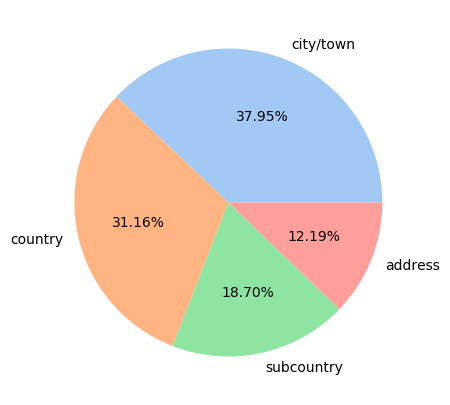

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(1, 1, figsize=(5,5))
#axs[0].pie(vc_1["loc_counts"], labels = vc_1["loc"],
#              colors = colors,
#              autopct='%.2f%%')
              #    hatch = ["..", "**", "oo", "OO"],

#axs[0].set_title('Mention with None')
#axs[1].pie(vc_1["only_loc_counts"], labels = vc_1["only_loc"],
#              colors = colors,
#              autopct='%.2f%%')
            #     hatch = ["..", "**", "oo", "OO"],
#axs[1].set_title('Mention Only')

axs.pie(vc_2["loc_counts"], labels = vc_2["loc"],
       #       hatch = ["O.", "..", "**", "oo", "OO"],
              colors = colors,
              autopct='%.2f%%')
#axs[1].set_title('Mention')
#axs[1, 1].pie(vc_2["only_loc_counts"], labels = vc_2["only_loc"],
       #       hatch = ["O.", "..", "**", "oo", "OO"],
       #       colors = colors,
       #       autopct='%.2f%%')
#axs[1, 1].set_title('Mention Only with None')

#for ax in axs.flat:
#    ax.set(xlabel='', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
    
fig.savefig("granularity.png")
fig.show()

# Distribution of Countries

In [21]:
mdf_loc.shape[0]

9017197

In [23]:
t1.shape[0]

7269062

In [24]:
mdf_loc[pd.notnull(mdf_loc.gmaps_address)].shape[0]

4139502

In [25]:
mdf_loc[pd.notnull(mdf_loc.gmaps_address)].drop_duplicates(["id"]).shape[0]

3462888

In [22]:
t1 = mdf_loc.drop_duplicates(["id"])
#t2 = mdf_loc_only.drop_duplicates(["id"])

print("Table ___ shows the mentioned locations by country for mentioned locations"\
      "(compared to tweets that had a mention and not a geotag).\n" \
      "A total ", 561236, "unique mentioned locations were identified.\n"
      "The total number of tweets with mentions was ", t1.shape[0] ,
   #   " and with"\
   #   "mentions only was ", t2.shape[0] ,
      ". Of those, ", t1[pd.isnull(t1.gmaps_address)].shape[0] ,
   #   t2[pd.isnull(t2.gmaps_address)].shape[0] ,
      " were missing values (respectively) due to geoparser not"\
      "having found a match or having been discarded.\n",
      828684, " of the tweets' mentions were discarded prior to using the Google Geoparser API",
      "which corresponded to ", 514284, "locations. \n",
      3253714, " of the tweets go through the parser, but a match was not found (this corresponded to",
      46952," locations).\n"
      "The following summaries were generated by removing the missing values (which corresponded to",
      t1[pd.isnull(t1.gmaps_address)].shape[0] / t1.shape[0],
   #   t2[pd.isnull(t2.gmaps_address)].shape[0] / t2.shape[0],
      " of their total numbers).")

Table ___ shows the mentioned locations by country for mentioned locations(compared to tweets that had a mention and not a geotag).
A total  561236 unique mentioned locations were identified.
The total number of tweets with mentions was  7269062 . Of those,  4082398  were missing values (respectively) due to geoparser nothaving found a match or having been discarded.
 828684  of the tweets' mentions were discarded prior to using the Google Geoparser API which corresponded to  514284 locations. 
 3253714  of the tweets go through the parser, but a match was not found (this corresponded to 46952  locations).
The following summaries were generated by removing the missing values (which corresponded to 0.5616127637926324  of their total numbers).


In [ ]:
# Investigating countries by tweet number (geotags vs no geotags)

loc_vc = mdf_loc.country.value_counts().rename_axis('unique_values').reset_index(name='counts')
loc_total = sum(loc_vc.counts)
#only_loc_vc = mdf_loc_only.country.value_counts().rename_axis('unique_values').reset_index(name='counts')
#only_loc_total = sum(only_loc_vc.counts)

vc = pd.DataFrame(data = {"loc": [],
                          "loc_counts": [],
                          "loc_prop": []})
      #                   "only_loc": [],
      #                   "only_loc_counts": [],
      #                   "only_loc_prop": []})

n = 20
for i in range(n):
    vc.loc[i, "loc"] = loc_vc.loc[i, "unique_values"]
    vc.loc[i, "loc_counts"] = loc_vc.loc[i, "counts"]
    vc.loc[i, "loc_prop"] = loc_vc.loc[i, "counts"] / loc_total
    
 #   vc.loc[i, "only_loc"] = only_loc_vc.loc[i, "unique_values"]
 #   vc.loc[i, "only_loc_counts"] = only_loc_vc.loc[i, "counts"]
 #   vc.loc[i, "only_loc_prop"] = only_loc_vc.loc[i, "counts"] / only_loc_total

vc.loc[n+1, "loc"] = "Other"
vc.loc[n+1, "loc_counts"] = loc_total - sum(loc_vc.loc[0:n, "counts"])
vc.loc[n+1, "loc_prop"] = vc.loc[n+1, "loc_counts"] / loc_total
#vc.loc[n+1, "only_loc"] = "Other"
#vc.loc[n+1, "only_loc_counts"] = only_loc_total - sum(only_loc_vc.loc[0:n, "counts"])
#vc.loc[n+1, "only_loc_prop"] = vc.loc[n+1, "only_loc_counts"] / only_loc_total

vc.reset_index(inplace=True, drop=True)
#vc.drop(0, axis=0, inplace=True)
vc

In [ ]:
print("For each user, the countries they mentioned over the course of the relevant time period were found.")

import itertools
import numpy as np

user_df = mdf_loc.groupby(['username'])["country"].unique().reset_index(name='countries')

# number of countries per user
countries_per_user = user_df.countries.str.len()

print()
print("The mean number of mentioned countries was ", np.mean(countries_per_user),
     "and the median was ", np.median(countries_per_user))

user_countries = user_df.countries.tolist()
all_countries = pd.DataFrame({"counts":list(itertools.chain.from_iterable(user_countries))})
temp = pd.DataFrame(all_countries.counts.value_counts()).reset_index().rename({"index": "country"}, axis=1)

total_loc = temp.counts.sum()
temp["prop"] = temp["counts"]/total_loc

n = 20

temp_keep = temp[0:n]
discarded = temp[n:temp.shape[0]]

temp_keep.loc[n, "country"] = "Other"
temp_keep.loc[n, "counts"] = discarded.counts.sum()
temp_keep.loc[n, "prop"] = temp_keep.loc[n, "counts"] / total_loc

temp = temp_keep
common_countries = temp

print("Table \ref{tab:geotagged-locations-users} shows their breakdown.")
temp

# Distribution of Places in Argentina, Brazil and USA

See what works better - city/town or subcountry

In [ ]:
# ARGENTINA - tweets

ar = mdf_loc[mdf_loc.country == "Argentina"]

loc_vc = ar["city/town"].value_counts().rename_axis('unique_values').reset_index(name='counts')
#loc_vc = ar["subcountry"].value_counts().rename_axis('unique_values').reset_index(name='counts')
loc_total = sum(loc_vc.counts)
#df_only =mdf_loc[df.ner_type != "LOC"]
#only_loc_vc = mdf_loc_only.country.value_counts().rename_axis('unique_values').reset_index(name='counts')
#only_loc_total = sum(loc_only_vc.counts)

vc = pd.DataFrame(data = {"loc": [],
                          "loc_counts": [],
                          "loc_prop": []})
                    #     "only_loc": [],
                   #      "only_loc_counts": [],
                   #      "only_loc_prop": []})

n = 20
for i in range(n):
    vc.loc[i, "loc"] = loc_vc.loc[i, "unique_values"]
    vc.loc[i, "loc_counts"] = loc_vc.loc[i, "counts"]
    vc.loc[i, "loc_prop"] = loc_vc.loc[i, "counts"] / loc_total
    
  #  vc.loc[i, "only_loc"] = only_loc_vc.loc[i, "unique_values"]
  #  vc.loc[i, "only_loc_counts"] = only_loc_vc.loc[i, "counts"]
  #  vc.loc[i, "only_loc_prop"] = only_loc_vc.loc[i, "counts"] / only_loc_total
    
vc.loc[n+1, "loc"] = "Other"
vc.loc[n+1, "loc_counts"] = loc_total - sum(loc_vc.loc[0:n, "counts"])
vc.loc[n+1, "loc_prop"] = vc.loc[n+1, "loc_counts"] / loc_total
#vc.loc[n+1, "only_loc"] = "Other"
#vc.loc[n+1, "only_loc_counts"] = only_loc_total - sum(only_loc_vc.loc[0:n, "counts"])
#vc.loc[n+1, "only_loc_prop"] = vc.loc[n+1, "only_loc_counts"] / only_loc_total

vc.reset_index(inplace=True, drop=True)
#vc.drop(0, axis=0, inplace=True)
print("Table \ref{tab:geotagged-locations} shows the number of top 20 most geotagged locations within Argentina,",
      "with 'Other' denoting other countries (does not include un-geotagged tweets).")
vc

In [ ]:
# BRAZIL - tweets

ar = mdf_loc[mdf_loc.country == "Brazil"]

loc_vc = ar["city/town"].value_counts().rename_axis('unique_values').reset_index(name='counts')
#loc_vc = ar["subcountry"].value_counts().rename_axis('unique_values').reset_index(name='counts')
loc_total = sum(loc_vc.counts)
#df_only =mdf_loc[df.ner_type != "LOC"]
#only_loc_vc = mdf_loc_only.country.value_counts().rename_axis('unique_values').reset_index(name='counts')
#only_loc_total = sum(loc_only_vc.counts)

vc = pd.DataFrame(data = {"loc": [],
                          "loc_counts": [],
                          "loc_prop": []})
                    #     "only_loc": [],
                   #      "only_loc_counts": [],
                   #      "only_loc_prop": []})

n = 20
for i in range(n):
    vc.loc[i, "loc"] = loc_vc.loc[i, "unique_values"]
    vc.loc[i, "loc_counts"] = loc_vc.loc[i, "counts"]
    vc.loc[i, "loc_prop"] = loc_vc.loc[i, "counts"] / loc_total
    
  #  vc.loc[i, "only_loc"] = only_loc_vc.loc[i, "unique_values"]
  #  vc.loc[i, "only_loc_counts"] = only_loc_vc.loc[i, "counts"]
  #  vc.loc[i, "only_loc_prop"] = only_loc_vc.loc[i, "counts"] / only_loc_total
    
vc.loc[n+1, "loc"] = "Other"
vc.loc[n+1, "loc_counts"] = loc_total - sum(loc_vc.loc[0:n, "counts"])
vc.loc[n+1, "loc_prop"] = vc.loc[n+1, "loc_counts"] / loc_total
#vc.loc[n+1, "only_loc"] = "Other"
#vc.loc[n+1, "only_loc_counts"] = only_loc_total - sum(only_loc_vc.loc[0:n, "counts"])
#vc.loc[n+1, "only_loc_prop"] = vc.loc[n+1, "only_loc_counts"] / only_loc_total

vc.reset_index(inplace=True, drop=True)
#vc.drop(0, axis=0, inplace=True)
print("Table \ref{tab:geotagged-locations} shows the number of top 20 most geotagged locations within Argentina,",
      "with 'Other' denoting other countries (does not include un-geotagged tweets).")
vc

In [ ]:
# US - tweets

ar = mdf_loc[mdf_loc.country == "USA"]

loc_vc = ar["city/town"].value_counts().rename_axis('unique_values').reset_index(name='counts')
#loc_vc = ar["subcountry"].value_counts().rename_axis('unique_values').reset_index(name='counts')
loc_total = sum(loc_vc.counts)
#df_only =mdf_loc[df.ner_type != "LOC"]
#only_loc_vc = mdf_loc_only.country.value_counts().rename_axis('unique_values').reset_index(name='counts')
#only_loc_total = sum(loc_only_vc.counts)

vc = pd.DataFrame(data = {"loc": [],
                          "loc_counts": [],
                          "loc_prop": []})
                    #     "only_loc": [],
                   #      "only_loc_counts": [],
                   #      "only_loc_prop": []})

n = 20
for i in range(n):
    vc.loc[i, "loc"] = loc_vc.loc[i, "unique_values"]
    vc.loc[i, "loc_counts"] = loc_vc.loc[i, "counts"]
    vc.loc[i, "loc_prop"] = loc_vc.loc[i, "counts"] / loc_total
    
  #  vc.loc[i, "only_loc"] = only_loc_vc.loc[i, "unique_values"]
  #  vc.loc[i, "only_loc_counts"] = only_loc_vc.loc[i, "counts"]
  #  vc.loc[i, "only_loc_prop"] = only_loc_vc.loc[i, "counts"] / only_loc_total
    
vc.loc[n+1, "loc"] = "Other"
vc.loc[n+1, "loc_counts"] = loc_total - sum(loc_vc.loc[0:n, "counts"])
vc.loc[n+1, "loc_prop"] = vc.loc[n+1, "loc_counts"] / loc_total
#vc.loc[n+1, "only_loc"] = "Other"
#vc.loc[n+1, "only_loc_counts"] = only_loc_total - sum(only_loc_vc.loc[0:n, "counts"])
#vc.loc[n+1, "only_loc_prop"] = vc.loc[n+1, "only_loc_counts"] / only_loc_total

vc.reset_index(inplace=True, drop=True)
#vc.drop(0, axis=0, inplace=True)
print("Table \ref{tab:geotagged-locations} shows the number of top 20 most geotagged locations within Argentina,",
      "with 'Other' denoting other countries (does not include un-geotagged tweets).")
vc

In [ ]:
# ARGENTINA MENTIONS - by user

ar = mdf_loc[mdf_loc.country == "Argentina"]

import itertools

user_ar = ar.groupby(['username'])["city/town"].unique().reset_index(name='countries')
#user_ar = ar.groupby(['username'])["subcountry"].unique().reset_index(name='countries')

# number of countries per user
countries_per_user = user_ar.countries.str.len()

#print()
#print("The mean number of geotagged placenames in Argentina was ", np.mean(countries_per_user),
#     "and the median was ", np.median(countries_per_user))

user_countries = user_ar.countries.tolist()
all_countries = pd.DataFrame({"counts":list(itertools.chain.from_iterable(user_countries))})
temp = pd.DataFrame(all_countries.counts.value_counts()).reset_index().rename({"index": "place"}, axis=1)

total_loc = temp.counts.sum()
temp["prop"] = temp["counts"]/total_loc

n = 20

temp_keep = temp[0:n]
discarded = temp[n:temp.shape[0]]

temp_keep.loc[n, "place"] = "Other"
temp_keep.loc[n, "counts"] = discarded.counts.sum()
temp_keep.loc[n, "prop"] = temp_keep.loc[n, "counts"] / total_loc

temp = temp_keep
print("Table \ref{tab:geotagged-locations-users} shows the breakdown of top 20 most common geotags",
      "within Argentina aggregated by user to avoid the problem of varying tweeting frequencies.")
temp

In [ ]:
# BRAZIL MENTIONS - by user


ar = mdf_loc[mdf_loc.country == "Brazil"]

import itertools

user_ar = ar.groupby(['username'])["city/town"].unique().reset_index(name='countries')
#user_ar = ar.groupby(['username'])["subcountry"].unique().reset_index(name='countries')

# number of countries per user
countries_per_user = user_ar.countries.str.len()

#print()
#print("The mean number of geotagged placenames in Argentina was ", np.mean(countries_per_user),
#     "and the median was ", np.median(countries_per_user))

user_countries = user_ar.countries.tolist()
all_countries = pd.DataFrame({"counts":list(itertools.chain.from_iterable(user_countries))})
temp = pd.DataFrame(all_countries.counts.value_counts()).reset_index().rename({"index": "place"}, axis=1)

total_loc = temp.counts.sum()
temp["prop"] = temp["counts"]/total_loc

n = 20

temp_keep = temp[0:n]
discarded = temp[n:temp.shape[0]]

temp_keep.loc[n, "place"] = "Other"
temp_keep.loc[n, "counts"] = discarded.counts.sum()
temp_keep.loc[n, "prop"] = temp_keep.loc[n, "counts"] / total_loc

temp = temp_keep
print("Table \ref{tab:geotagged-locations-users} shows the breakdown of top 20 most common geotags",
      "within Argentina aggregated by user to avoid the problem of varying tweeting frequencies.")
temp

In [ ]:
# US MENTIONS - by user


ar = mdf_loc[mdf_loc.country == "USA"]

import itertools

user_ar = ar.groupby(['username'])["city/town"].unique().reset_index(name='countries')
#user_ar = ar.groupby(['username'])["subcountry"].unique().reset_index(name='countries')

# number of countries per user
countries_per_user = user_ar.countries.str.len()

#print()
#print("The mean number of geotagged placenames in Argentina was ", np.mean(countries_per_user),
#     "and the median was ", np.median(countries_per_user))

user_countries = user_ar.countries.tolist()
all_countries = pd.DataFrame({"counts":list(itertools.chain.from_iterable(user_countries))})
temp = pd.DataFrame(all_countries.counts.value_counts()).reset_index().rename({"index": "place"}, axis=1)

total_loc = temp.counts.sum()
temp["prop"] = temp["counts"]/total_loc

n = 20

temp_keep = temp[0:n]
discarded = temp[n:temp.shape[0]]

temp_keep.loc[n, "place"] = "Other"
temp_keep.loc[n, "counts"] = discarded.counts.sum()
temp_keep.loc[n, "prop"] = temp_keep.loc[n, "counts"] / total_loc

temp = temp_keep
print("Table \ref{tab:geotagged-locations-users} shows the breakdown of top 20 most common geotags",
      "within Argentina aggregated by user to avoid the problem of varying tweeting frequencies.")
temp

## Epi weeks

In [ ]:
# Countries over Epi Weeks - tweets (No Argentina)

from itertools import product
import matplotlib.pyplot as plt

top_20 = mdf_loc.country.value_counts().rename_axis('unique_values').reset_index(name='counts')
#top_20 = top_20.loc[,0:20]
top_20 = top_20.loc[0:6, "unique_values"].tolist()
top_20

import plotly.express as px

loc_p = mdf_loc[(mdf_loc.country.isin(top_20)) & (mdf_loc.country != "Argentina")]
loc_p = loc_p.groupby(['country', "epi_week"])["id"].count().reset_index(name='counts')
loc_p = loc_p.sort_values(["epi_week"], ascending=True).reset_index(drop=True)

loc_temp = pd.DataFrame(list(product(loc_p.country.unique(), loc_p.epi_week.unique())), columns=['country', 'epi_week'])
loc_temp["counts"] = 0

loc_p = pd.concat([loc_p, loc_temp]).drop_duplicates(["country", "epi_week"])#, ignore_index=True)
loc_p = loc_p.sort_values(["epi_week"], ascending=True)

#only_loc_p = df_loc[df_loc.country.isin(top_20)]
#only_loc_p = only_loc_p.groupby(['country', "epi_week"])["id"].count().reset_index(name='counts')
# plot pie chart

fig = px.line(loc_p, x="epi_week", y="counts", color="country",
                 labels={
                     "epi_week": "Epi Week",
                     "counts": "Number of Tweets",
                     "country": "Country"},
             width=800,
             height=500)

fig.write_image("mentioned_tweets_country_epi_week.png")
fig.write_html("html/mentioned_tweets_country_epi_week.html")
fig.show()

In [ ]:
# Argentina over Epi Weeks - tweets

from itertools import product
import matplotlib.pyplot as plt

top_20 = mdf_loc.country.value_counts().rename_axis('unique_values').reset_index(name='counts')
#top_20 = top_20.loc[,0:20]
top_20 = top_20.loc[0:6, "unique_values"].tolist()
top_20

import plotly.express as px

loc_p = mdf_loc[(mdf_loc.country == "Argentina")]
loc_p = loc_p.groupby(['country', "epi_week"])["id"].count().reset_index(name='counts')
loc_p = loc_p.sort_values(["epi_week"], ascending=True).reset_index(drop=True)

loc_temp = pd.DataFrame(list(product(loc_p.country.unique(), loc_p.epi_week.unique())), columns=['country', 'epi_week'])
loc_temp["counts"] = 0

loc_p = pd.concat([loc_p, loc_temp]).drop_duplicates(["country", "epi_week"])#, ignore_index=True)
loc_p = loc_p.sort_values(["epi_week"], ascending=True)

#only_loc_p = df_loc[df_loc.country.isin(top_20)]
#only_loc_p = only_loc_p.groupby(['country', "epi_week"])["id"].count().reset_index(name='counts')
# plot pie chart

fig = px.line(loc_p, x="epi_week", y="counts", #color="country",
                 labels={
                     "epi_week": "Epi Week",
                     "counts": "Number of Tweets"},
                  #   "country": "Country"},
             width=800,
             height=500)

fig.write_image("mentioned_tweets_argentina_epi_week.png")
fig.write_html("html/mentioned_tweets_argentina_epi_week.html")
fig.show()

In [ ]:
# USA over Epi Weeks - tweets

from itertools import product
import matplotlib.pyplot as plt

top_20 = mdf_loc.country.value_counts().rename_axis('unique_values').reset_index(name='counts')
#top_20 = top_20.loc[,0:20]
top_20 = top_20.loc[0:6, "unique_values"].tolist()
top_20

import plotly.express as px

loc_p = mdf_loc[(mdf_loc.country == "United States")]
loc_p = loc_p.groupby(['country', "epi_week"])["id"].count().reset_index(name='counts')
loc_p = loc_p.sort_values(["epi_week"], ascending=True).reset_index(drop=True)

loc_temp = pd.DataFrame(list(product(loc_p.country.unique(), loc_p.epi_week.unique())), columns=['country', 'epi_week'])
loc_temp["counts"] = 0

loc_p = pd.concat([loc_p, loc_temp]).drop_duplicates(["country", "epi_week"])#, ignore_index=True)
loc_p = loc_p.sort_values(["epi_week"], ascending=True)

#only_loc_p = df_loc[df_loc.country.isin(top_20)]
#only_loc_p = only_loc_p.groupby(['country', "epi_week"])["id"].count().reset_index(name='counts')
# plot pie chart

fig = px.line(loc_p, x="epi_week", y="counts", #color="country",
                 labels={
                     "epi_week": "Epi Week",
                     "counts": "Number of Tweets"},
                  #   "country": "Country"},
             width=800,
             height=500)

fig.write_image("mentioned_tweets_us_epi_week.png")
fig.write_html("html/mentioned_tweets_us_epi_week.html")
fig.show()

In [ ]:
# Brazil over Epi Weeks - tweets

from itertools import product
import matplotlib.pyplot as plt

top_20 = mdf_loc.country.value_counts().rename_axis('unique_values').reset_index(name='counts')
#top_20 = top_20.loc[,0:20]
top_20 = top_20.loc[0:6, "unique_values"].tolist()
top_20

import plotly.express as px

loc_p = mdf_loc[(mdf_loc.country == "Brazil")]
loc_p = loc_p.groupby(['country', "epi_week"])["id"].count().reset_index(name='counts')
loc_p = loc_p.sort_values(["epi_week"], ascending=True).reset_index(drop=True)

loc_temp = pd.DataFrame(list(product(loc_p.country.unique(), loc_p.epi_week.unique())), columns=['country', 'epi_week'])
loc_temp["counts"] = 0

loc_p = pd.concat([loc_p, loc_temp]).drop_duplicates(["country", "epi_week"])#, ignore_index=True)
loc_p = loc_p.sort_values(["epi_week"], ascending=True)

#only_loc_p = df_loc[df_loc.country.isin(top_20)]
#only_loc_p = only_loc_p.groupby(['country', "epi_week"])["id"].count().reset_index(name='counts')
# plot pie chart

fig = px.line(loc_p, x="epi_week", y="counts", #color="country",
                 labels={
                     "epi_week": "Epi Week",
                     "counts": "Number of Tweets"},
                  #   "country": "Country"},
             width=800,
             height=500)

fig.write_image("mentioned_tweets_br_epi_week.png")
fig.write_html("html/mentioned_tweets_br_epi_week.html")
fig.show()

In [ ]:
# Countries over Epi Weeks - users

import itertools

cepi = mdf_loc.drop_duplicates(["username", "country", "epi_week"])
cepi = cepi.groupby(['country', "epi_week"])["username"].count().reset_index(name='counts')
cepi = cepi.sort_values(["epi_week"], ascending=True).reset_index(drop=True)


top_20 = common_countries.loc[0:6, "country"].tolist()

import plotly.express as px

loc_p = cepi[(cepi.country.isin(top_20)) & (cepi.country != "Argentina")]
#loc_p = loc_p.groupby(['country', "epi_week"])["id"].count().reset_index(name='counts')
#loc_p = loc_p.sort_values(["epi_week"], ascending=True).reset_index(drop=True)

loc_temp = pd.DataFrame(list(product(loc_p.country.unique(), loc_p.epi_week.unique())), columns=['country', 'epi_week'])
loc_temp["counts"] = 0

loc_p = pd.concat([loc_p, loc_temp]).drop_duplicates(["country", "epi_week"])#, ignore_index=True)
loc_p = loc_p.sort_values(["epi_week"], ascending=True)


fig = px.line(loc_p, x="epi_week", y="counts", color="country",
                 labels={
                     "epi_week": "Epi Week",
                     "counts": "Number of Users in Country",
                     "country": "Country"},
             width=800,
             height=500)

fig.write_image("mentioned_users_country_epi_week.png")
fig.write_html("html/mentioned_users_country_epi_week.html")
fig.show()

In [ ]:
# Argentina over Epi Weeks - users

import itertools

cepi = mdf_loc.drop_duplicates(["username", "country", "epi_week"])
cepi = cepi.groupby(['country', "epi_week"])["username"].count().reset_index(name='counts')
cepi = cepi.sort_values(["epi_week"], ascending=True).reset_index(drop=True)


top_20 = common_countries.loc[0:6, "country"].tolist()

import plotly.express as px

loc_p = cepi[(cepi.country == "Argentina")]
#loc_p = loc_p.groupby(['country', "epi_week"])["id"].count().reset_index(name='counts')
#loc_p = loc_p.sort_values(["epi_week"], ascending=True).reset_index(drop=True)

loc_temp = pd.DataFrame(list(product(loc_p.country.unique(), loc_p.epi_week.unique())), columns=['country', 'epi_week'])
loc_temp["counts"] = 0

loc_p = pd.concat([loc_p, loc_temp]).drop_duplicates(["country", "epi_week"])#, ignore_index=True)
loc_p = loc_p.sort_values(["epi_week"], ascending=True)


fig = px.line(loc_p, x="epi_week", y="counts", #color="country",
                 labels={
                     "epi_week": "Epi Week",
                     "counts": "Number of Users in Country"},
                   #  "country": "Country"},
             width=800,
             height=500)

fig.write_image("mentioned_users_argentina_epi_week.png")
fig.write_html("html/mentioned_users_argentina_epi_week.html")
fig.show()

# Organisations and People

In [ ]:
import pandas as pd

mdf_org = pd.read_feather("s3://mt5599/final/mentioned_org.feather")
mdf_per = pd.read_feather("s3://mt5599/final/mentioned_per.feather")

In [ ]:
mdf_org.ner_word.value_counts().rename_axis('orgs').reset_index(name='counts')[0:50]

In [32]:
len(mdf_org.username.unique())

87674

In [ ]:
mdf_per.ner_word.value_counts().rename_axis('per').reset_index(name='counts')[0:50]

# gap
# gap
# gap
# gap
# gap
# gap
# gap
# gap
# gap
# gap
# gap
# gap
# gap

In [ ]:
# ^ like above code, but for people:

mdf_loc1 = mdf_loc[mdf_loc.country == "Argentina"]
#mdf_loc_only1= mdf_loc_only[mdf_loc_only.country == "Argentina"]

#loc_p = mdf_loc1.groupby(['city/town', "epi_week"])['id'].count().reset_index(name='counts')
loc_p = mdf_loc1["city/town"].value_counts().rename_axis('unique_values').reset_index(name='counts')
#only_loc_p = mdf_loc_only1.groupby(['city/town', "epi_week"])['id'].count().reset_index(name='counts')

# plot pie chart
loc_p

In [ ]:
# Investigating countries with Argnetina (geotags vs no geotags)

# Investigating granularity (geotags vs no geotags)

mdf_loc1 = mdf_loc[mdf_loc.country == "Argentina"]
loc_vc = mdf_loc1["city/town"].value_counts().rename_axis('unique_values').reset_index(name='counts')
loc_total = sum(loc_vc.counts)
#mdf_loc_only1= mdf_loc_only[mdf_loc_only.country == "Argentina"]
#only_loc_vc = mdf_loc_only1["city/town"].value_counts().rename_axis('unique_values').reset_index(name='counts')
#only_loc_total = sum(only_loc_vc.counts)

vc = pd.DataFrame(data = {"loc": [],
                          "loc_counts": [],
                          "loc_prop": [],
    #                     "only_loc": [],
    #                     "only_loc_counts": [],
    #                     "only_loc_prop": []})

n = 20
for i in range(n):
    vc.loc[i, "loc"] = loc_vc.loc[i, "unique_values"]
    vc.loc[i, "loc_counts"] = loc_vc.loc[i, "counts"]
    vc.loc[i, "loc_prop"] = loc_vc.loc[i, "counts"] / loc_total
    
 #   vc.loc[i, "only_loc"] = only_loc_vc.loc[i, "unique_values"]
 #   vc.loc[i, "only_loc_counts"] = only_loc_vc.loc[i, "counts"]
 #   vc.loc[i, "only_loc_prop"] = only_loc_vc.loc[i, "counts"] / only_loc_total
   
vc.loc[n+1, "loc"] = "Other"
vc.loc[n+1, "loc_counts"] = loc_total - sum(loc_vc.loc[0:n, "counts"])
vc.loc[n+1, "loc_prop"] = vc.loc[n+1, "loc_counts"] / loc_total
#vc.loc[n+1, "only_loc"] = "Other"
#vc.loc[n+1, "only_loc_counts"] = only_loc_total - sum(only_loc_vc.loc[0:n, "counts"])
#vc.loc[n+1, "only_loc_prop"] = vc.loc[n+1, "only_loc_counts"] / only_loc_total

vc.reset_index(inplace=True, drop=True)
#vc.drop(0, axis=0, inplace=True)
vc

### Epi Weeks

Where are people during each Epi week?

In [ ]:
loc_p = mdf_loc.groupby(['country', "epi_week"])['username'].count().reset_index(name='counts')
#only_loc_p = mdf_loc_only.groupby(['country', "epi_week"])['username'].count().reset_index(name='counts')

In [ ]:
# plot number of people in each country over time

import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and style
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style(style={'axes.edgecolor': 'black', 'axes.facecolor': 'white'})

sns.lineplot(data=loc_p, x="epi_week", y="counts", hue="country")

# Rename axis labels
plt.xlabel('Epi Week / Date')
plt.ylabel('Number of Users')

# Add legend
plt.legend()
plt.savefig('distance_dup_frequency.png')